In [ ]:
# 얘 실행!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 아까 인코딩했던 파일 실행하는 코드! 경로변경필요
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_TargetEncoding_1.csv",encoding='utf-8')
#df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/HomeC_HashEncoding.csv",encoding='utf-8')

In [ ]:
df.head()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,hour,day_of_week,is_weekend,temp_humidity_interaction,use_lag_1,use_lag_2,gen_lag_1,gen_lag_2,use_rolling_mean_3,gen_rolling_mean_3,use_gen_ratio,temp_pressure_diff
0,0.465133,0.003450,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,0.012950,0.000717,0.000083,0.000017,0.031800,0.001000,0.004233,0.001633,0.003450,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.497067,0.714200,0.003417,0.003417,0.558800,0.003428,134.782189,-980.38
1,0.512933,0.003417,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,0.012883,0.000733,0.000083,0.000017,0.031817,0.001017,0.004233,0.001683,0.003417,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.465133,0.497067,0.003450,0.003417,0.491711,0.003428,150.082888,-980.38
2,0.651283,0.003417,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,0.012917,0.000467,0.000033,0.000000,0.031800,0.001000,0.004233,0.001667,0.003417,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.512933,0.465133,0.003417,0.003450,0.543117,0.003428,190.563719,-980.38
3,0.710450,0.003433,0.710450,0.000050,0.142050,0.062783,0.043283,0.140700,0.124317,0.012867,0.000417,0.000033,0.000017,0.031817,0.001033,0.004250,0.001650,0.003433,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.651283,0.512933,0.003417,0.003417,0.624889,0.003422,206.866952,-980.38
4,1.195683,0.003400,1.195683,0.000267,0.502567,0.062733,0.043600,0.137517,0.123750,0.012017,0.000450,0.000400,0.000000,0.031717,0.001033,0.004233,0.001567,0.003400,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.710450,0.651283,0.003433,0.003417,0.852472,0.003417,351.568166,-980.38


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b53d7bb032c224248f87e649b4659245ce57e68877c4bc2b9b70c267ca223aa3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# 얘 실행!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import root_mean_squared_error, make_scorer, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import lime
import lime.lime_tabular
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import logging
from multiprocessing import Pool
from joblib import Parallel, delayed
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
# 얘 실행!
print("scaling")

logging.basicConfig(level=logging.INFO)

pd.set_option('display.max_columns', None)

#df = pd.read_csv('HomeC_TargetEncoding.csv')
#df = df[['gen [kW]']]

min_value = df['gen [kW]'].min()
max_value = df['gen [kW]'].max()

total_data = df.shape[0]
scaled_data = []

for x_value in np.arange(min_value, max_value, (max_value - min_value) * 0.05):
    lower_bound = x_value - (max_value - min_value) * 0.025
    upper_bound = x_value + (max_value - min_value) * 0.025

    range_data = df[(df['gen [kW]'] >= lower_bound) &
                    (df['gen [kW]'] <= upper_bound)]
    count_in_range = range_data.shape[0]

    ratio = (count_in_range / total_data) * 100

    print(f"{x_value:.2f} -> {ratio:.2f}%")

    if count_in_range > 0:
        spread = np.linspace(lower_bound, upper_bound, count_in_range)
        scaled_data.extend(spread)

scaled_df = pd.DataFrame({'gen [kW]': scaled_data})


def min_max_scaler(x): return (x - x.min()) / (x.max() - x.min())


direct_minmax_df = pd.DataFrame({'gen [kW]': min_max_scaler(df['gen [kW]'])})

scaled_minmax_df = pd.DataFrame(
    {'gen [kW]': min_max_scaler(scaled_df['gen [kW]'])})

scaled_df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled2.csv', index=False)


print("done!")

scaling
0.00 -> 61.35%
0.03 -> 7.89%
0.06 -> 4.90%
0.09 -> 3.34%
0.12 -> 2.44%
0.15 -> 2.00%
0.18 -> 1.71%
0.21 -> 1.53%
0.25 -> 1.34%
0.28 -> 1.51%
0.31 -> 1.81%
0.34 -> 2.14%
0.37 -> 2.62%
0.40 -> 2.36%
0.43 -> 1.60%
0.46 -> 0.98%
0.49 -> 0.34%
0.52 -> 0.10%
0.55 -> 0.03%
0.58 -> 0.00%
done!


In [ ]:
scaled_df.head()

,gen [kW]
0,-0.015347
1,-0.015347
2,-0.015347
3,-0.015347
4,-0.015347


In [ ]:
# 얘 실행!
df['gen [kW]'] = scaled_df['gen [kW]']

In [ ]:
df.head()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,hour,day_of_week,is_weekend,temp_humidity_interaction,use_lag_1,use_lag_2,gen_lag_1,gen_lag_2,use_rolling_mean_3,gen_rolling_mean_3,use_gen_ratio,temp_pressure_diff
0,0.465133,-0.015347,0.465133,0.000017,0.064500,0.062633,0.043250,0.005017,0.123350,0.012950,0.000717,0.000083,0.000017,0.031800,0.001000,0.004233,0.001633,0.003450,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.497067,0.714200,0.003417,0.003417,0.558800,0.003428,134.782189,-980.38
1,0.512933,-0.015347,0.512933,0.000017,0.111333,0.063883,0.043300,0.004967,0.123867,0.012883,0.000733,0.000083,0.000017,0.031817,0.001017,0.004233,0.001683,0.003417,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.465133,0.497067,0.003450,0.003417,0.491711,0.003428,150.082888,-980.38
2,0.651283,-0.015347,0.651283,0.000017,0.114583,0.063200,0.043283,0.114167,0.124267,0.012917,0.000467,0.000033,0.000000,0.031800,0.001000,0.004233,0.001667,0.003417,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.512933,0.465133,0.003417,0.003450,0.543117,0.003428,190.563719,-980.38
3,0.710450,-0.015347,0.710450,0.000050,0.142050,0.062783,0.043283,0.140700,0.124317,0.012867,0.000417,0.000033,0.000017,0.031817,0.001033,0.004250,0.001650,0.003433,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.651283,0.512933,0.003417,0.003417,0.624889,0.003422,206.866952,-980.38
4,1.195683,-0.015347,1.195683,0.000267,0.502567,0.062733,0.043600,0.137517,0.123750,0.012017,0.000450,0.000400,0.000000,0.031717,0.001033,0.004233,0.001567,0.003400,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.710450,0.651283,0.003433,0.003417,0.852472,0.003417,351.568166,-980.38


In [ ]:
df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled2.csv', index=False)

In [ ]:
# 얘 실행!
# 모든 열에 대해 결측값 존재 여부 확인
print(df.isnull().sum())

use [kW]                     0
gen [kW]                     2
Dishwasher [kW]              0
Furnace 1 [kW]               0
Furnace 2 [kW]               0
Home office [kW]             0
Fridge [kW]                  0
Wine cellar [kW]             0
Garage door [kW]             0
Kitchen 12 [kW]              0
Kitchen 14 [kW]              0
Kitchen 38 [kW]              0
Barn [kW]                    0
Well [kW]                    0
Microwave [kW]               0
Living room [kW]             0
Solar [kW]                   0
temperature                  0
humidity                     0
visibility                   0
summary                      0
apparentTemperature          0
pressure                     0
windSpeed                    0
cloudCover                   0
windBearing                  0
precipIntensity              0
dewPoint                     0
precipProbability            0
hour                         0
day_of_week                  0
is_weekend                   0
temp_hum

In [ ]:
# 얘 실행!
# 결측값 제거
df.dropna(axis=0, how='any', inplace=True)

In [ ]:
# 얘 실행!
# 전처리 3번 : 가구들 PCA 처리 여부
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 적용 대상 : 다른 가구 사용량
columns_to_pca = ['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]',
                  'Fridge [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
                  'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]', 'Microwave [kW]',
                  'Living room [kW]', 'Solar [kW]','gen [kW]']

X = df[columns_to_pca].values

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 주성분 결과 데이터프레임 생성
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

print("주성분 별 설명된 분산 비율:")
print(pca.explained_variance_ratio_)

print("\nPCA 결과 데이터프레임:")
print(df_pca.head())

df = pd.concat([df, df_pca], axis=1)
print(df.head())

주성분 별 설명된 분산 비율:
[0.08799578 0.07655651 0.07375029 0.06920837 0.06487825 0.06403338
 0.062383   0.06227935 0.0618744  0.06073009 0.05843217 0.05619248
 0.05543235 0.05281868 0.04969057 0.04374434]

PCA 결과 데이터프레임:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.493166  0.184579  0.573937  0.264478 -0.742169 -0.459097  0.526550   
1 -0.345873  0.176049  0.623151  0.261694 -0.653481 -0.514000  0.540698   
2 -1.014470  0.305829 -0.261338  0.111797  0.050407 -1.225074  0.419133   
3 -0.502951  0.752023  0.278382  0.773032 -0.317803 -1.030953  0.627361   
4  0.152211  0.307004  0.068355  0.165440  0.827669 -1.735408  0.508984   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.167521 -0.030782  0.017426  0.582406 -0.874523  0.581304 -0.691083   
1 -0.174930 -0.026500 -0.004538  0.546882 -0.916797  0.526231 -0.575981   
2  0.064428  0.410891  0.291764 -0.327874 -0.642397 -0.174792 -0.204418   
3  0.217788  0.276182  0.243460 -0.2

In [ ]:
# 얘 실행!
df = df.drop(columns=columns_to_pca)
df.head()


,use [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,hour,day_of_week,is_weekend,temp_humidity_interaction,use_lag_1,use_lag_2,gen_lag_1,gen_lag_2,use_rolling_mean_3,gen_rolling_mean_3,use_gen_ratio,temp_pressure_diff,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.465133,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.497067,0.714200,0.003417,0.003417,0.558800,0.003428,134.782189,-980.38,-0.493166,0.184579,0.573937,0.264478,-0.742169,-0.459097,0.526550,-0.167521,-0.030782,0.017426,0.582406,-0.874523,0.581304,-0.691083,0.006026,-0.880562
1,0.512933,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.465133,0.497067,0.003450,0.003417,0.491711,0.003428,150.082888,-980.38,-0.345873,0.176049,0.623151,0.261694,-0.653481,-0.514000,0.540698,-0.174930,-0.026500,-0.004538,0.546882,-0.916797,0.526231,-0.575981,-0.019297,-1.025739
2,0.651283,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.512933,0.465133,0.003417,0.003450,0.543117,0.003428,190.563719,-980.38,-1.014470,0.305829,-0.261338,0.111797,0.050407,-1.225074,0.419133,0.064428,0.410891,0.291764,-0.327874,-0.642397,-0.174792,-0.204418,-0.765924,-0.571137
3,0.710450,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.651283,0.512933,0.003417,0.003417,0.624889,0.003422,206.866952,-980.38,-0.502951,0.752023,0.278382,0.773032,-0.317803,-1.030953,0.627361,0.217788,0.276182,0.243460,-0.252829,0.079750,0.435727,-0.313620,-0.248542,-1.136150
4,1.195683,35.87,0.812793,0.61,10.0,0.752335,29.4,1016.25,8.29,0.75,285.0,0.0,23.9,0.0,5,4,0,21.8807,0.710450,0.651283,0.003433,0.003417,0.852472,0.003417,351.568166,-980.38,0.152211,0.307004,0.068355,0.165440,0.827669,-1.735408,0.508984,0.044268,0.466411,0.156614,-0.769211,-0.763660,-0.682261,0.780753,-0.990759,-1.799438


In [ ]:
# 얘 실행! PCA 한거 저장 ( 근데 인코딩 방식에 따라 다르기 때문에 2개 파일 저장해야 할 거에요. )
df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash_pca.csv', encoding='utf-8')

In [ ]:
# 얘 실행!
# 변수선택
print("variable selection")


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_values = Parallel(n_jobs=-1)(
        delayed(variance_inflation_factor)(X.values, i)
        for i in range(X.shape[1])
    )
    vif_data["VIF"] = vif_values
    return vif_data


def vif_selection(X, want_max_vif=10.0):
    best_features = []
    best_score = 0
    all_features = list(X.columns)

    correlation_matrix = X[all_features].corr().abs()
    mean_correlation = correlation_matrix.mean()
    current_features = [mean_correlation.idxmin()]
    remaining_features = [f for f in all_features if f not in current_features]

    while remaining_features:
        best_feature = None
        best_temp_score = best_score
        print(f"\n{current_features}")

        for feature in remaining_features:

            temp_features = current_features + [feature]
            temp_X = X[temp_features]
            vif_results = calculate_vif(temp_X)
            vif_max = vif_results['VIF'].max()
            print(feature, vif_max)

            if vif_max <= want_max_vif:
                if len(temp_features) > best_temp_score:
                    best_temp_score = len(temp_features)
                    best_feature = feature

        if best_feature is None:
            break

        current_features.append(best_feature)
        remaining_features.remove(best_feature)

        if len(current_features) > best_score:
            best_score = len(current_features)
            best_features = current_features.copy()

        print(f"add: {best_feature}, | {len(current_features)} / {len(all_features)}")

    X_selected = X[best_features]
    final_vif = calculate_vif(X_selected)

    print("\ngood!")
    print(final_vif.sort_values('VIF', ascending=False))

    return X_selected, final_vif


# df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash_pca.csv', encoding='utf-8')

x = df.drop(columns=[col for col in df.columns if 'kw' in col.lower(
)] + [col for col in df.columns if 'use' in col.lower()])
y = df['use [kW]']


numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns
#numeric_cols = numeric_cols.difference(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']) # 해시 인코딩 다룰 때만 사용!
binary_cols_df2 = df.select_dtypes(include=['bool']).columns
x_numeric = x[numeric_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(
    x_numeric.values, i) for i in range(x_numeric.shape[1])]

logging.info(f"vif_data: {vif_data}")

X_selected_numeric, final_vif = vif_selection(x_numeric, want_max_vif=10.0)

X_selected = pd.concat([X_selected_numeric, df[binary_cols_df2]], axis=1)

# 해시 인코딩 다룰 때만 사용! 해시 인코딩 다룰 때에는 이거 주석 풀어주세요
"""
hash_cols = x[['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']]
X_selected = pd.concat([X_selected, hash_cols], axis=1)
"""

#X_selected.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash.csv', encoding='utf-8')
#X_selected.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_target_1.csv', encoding='utf-8')

print("")
print(X_selected)

variable selection


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



['hour']
temperature 2.7145809273727353
humidity 3.211063018771717
visibility 3.563695203934179
summary 3.9084591296164772
apparentTemperature 2.452970567920263
pressure 3.956927973612619
windSpeed 2.2953538816981456
cloudCover 1.3533283439742974
windBearing 2.4913680792726374
precipIntensity 1.0402401358521678
dewPoint 2.357823924063288
precipProbability 1.0862836819807926
day_of_week 1.9763670271947225
is_weekend 1.3242339310091504
temp_humidity_interaction 2.497482777030979
gen_lag_1 1.218544890096642
gen_lag_2 1.2185149946990042
gen_rolling_mean_3 1.2210357851730556
temp_pressure_diff 3.9732442809188133
add: temperature, | 2 / 20

['hour', 'temperature']
humidity 5.947469875160092
visibility 9.576133838340432
summary 11.268033641707781
apparentTemperature 211.90345113865044
pressure 11.70114075362608
windSpeed 3.5594110153003045
cloudCover 2.9980562468582326
windBearing 3.7811644241817626
precipIntensity 2.7504723950289165
dewPoint 26.974537047485253
precipProbability 2.7823514695

In [ ]:
X_selected.head()

,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1
0,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417
1,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003450
2,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417
3,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417
4,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003433


In [ ]:
y.head()

,use [kW]
0,0.465133
1,0.512933
2,0.651283
3,0.710450
4,1.195683


In [ ]:
# 얘 실행!
y_df = y.to_frame(name='use [kW]')
X_y_combined = pd.concat([X_selected, y_df], axis=1)

print(X_y_combined.head())

   hour  temperature  humidity  windSpeed  cloudCover  windBearing  \
0     5        35.87      0.61       8.29        0.75        285.0   
1     5        35.87      0.61       8.29        0.75        285.0   
2     5        35.87      0.61       8.29        0.75        285.0   
3     5        35.87      0.61       8.29        0.75        285.0   
4     5        35.87      0.61       8.29        0.75        285.0   

   precipIntensity  precipProbability  day_of_week  gen_lag_1  icon_clear-day  \
0              0.0                0.0            4   0.003417           False   
1              0.0                0.0            4   0.003450           False   
2              0.0                0.0            4   0.003417           False   
3              0.0                0.0            4   0.003417           False   
4              0.0                0.0            4   0.003433           False   

   icon_clear-night  icon_cloudy  icon_fog  icon_partly-cloudy-day  \
0             False   

In [ ]:
# 얘 실행! 최종 결과 저장
#X_y_combined.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_final_hash.csv', encoding='utf-8')
#X_y_combined.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_final_target.csv', encoding='utf-8')
X_y_combined.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/selected_target1.csv', encoding='utf-8')

In [ ]:
#### 여기까지 했으면 목차에서 해결해보기로 넘어가주세요!

# 모델링

In [ ]:
if len(X_selected) > len(y):
    X_selected = X_selected.iloc[:-1]
elif len(y) > len(X_selected):
    y = y.iloc[:-1]

X_train, X_temp, y_train, y_temp = train_test_split(
    X_selected, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(352589, 19) (75555, 19) (75555, 19)


In [ ]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.5)
ridge_model = Ridge(alpha=0.5)
elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [ ]:
linear_predicted_value = linear_model.predict(X_test)
lasso_predicted_value = lasso_model.predict(X_test)
ridge_predicted_value = ridge_model.predict(X_test)
elastic_predicted_value = elastic_model.predict(X_test)


#n = df.shape[1]
n = len(X_test)
p = X_test.shape[1]

linear_r2 = r2_score(y_test, linear_predicted_value)
linear_adj_r2 = 1 - (1-linear_r2)*(n-1)/(n-p-1)

lasso_r2 = r2_score(y_test, lasso_predicted_value)
lasso_adj_r2 = 1 - (1-lasso_r2)*(n-1)/(n-p-1)

ridge_r2 = r2_score(y_test, ridge_predicted_value)
ridge_adj_r2 = 1 - (1-ridge_r2)*(n-1)/(n-p-1)

elastic_r2 = r2_score(y_test, elastic_predicted_value)
elastic_adj_r2 = 1 - (1-elastic_r2)*(n-1)/(n-p-1)

coefficients1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})
coefficients2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_model.coef_
})
coefficients3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_model.coef_
})
coefficients4 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})
print("============= linear ==============")
print(f"         R² Score: {linear_r2:.4f}")
print(f"Adjusted R² Score: {linear_adj_r2:.4f}")
print("         Intercept:", linear_model.intercept_)
print(coefficients1.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= lasso ==============")
print(f"         R² Score: {lasso_r2:.4f}")
print(f"Adjusted R² Score: {lasso_adj_r2:.4f}")
print("         Intercept:", lasso_model.intercept_)
print(coefficients2.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= ridge ==============")
print(f"         R² Score: {ridge_r2:.4f}")
print(f"Adjusted R² Score: {ridge_adj_r2:.4f}")
print("         Intercept:", ridge_model.intercept_)
print(coefficients3.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")
print("============= elastic ==============")
print(f"         R² Score: {elastic_r2:.4f}")
print(f"Adjusted R² Score: {elastic_adj_r2:.4f}")
print("         Intercept:", elastic_model.intercept_)
print(coefficients4.sort_values(by='Coefficient', ascending=False))
print("=========================================")
print("\n\n")

============= linear ==============
         R² Score: 0.0336
Adjusted R² Score: 0.0333
         Intercept: 1.1110967135597534
                     Feature  Coefficient
6            precipIntensity     6.398910
13                  icon_fog     0.171330
10            icon_clear-day     0.050639
12               icon_cloudy     0.022321
11          icon_clear-night     0.006271
0                       hour     0.005351
3                  windSpeed     0.000820
5                windBearing     0.000032
1                temperature    -0.001257
15  icon_partly-cloudy-night    -0.003172
14    icon_partly-cloudy-day    -0.004339
2                   humidity    -0.015149
17                 icon_snow    -0.017199
16                 icon_rain    -0.032575
8                day_of_week    -0.058182
4                 cloudCover    -0.113722
7          precipProbability    -0.137291
18                 icon_wind    -0.193276
9                  gen_lag_1    -1.045209



============= lasso ==========

In [ ]:
def objective(params):
    rf = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        random_state=42, n_jobs=-1
    )
    score = cross_val_score(rf, X_train, y_train, scoring='r2', cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}


space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest,
            max_evals=50, trials=trials)

print("Best hyperparameters:", best)

rf_model = RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    min_samples_split=int(best['min_samples_split']),
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_predicted_value = rf_model.predict(X_train)

coefficients_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

print("=============== random forest ===============")
print(coefficients_rf.sort_values(by='Importance', ascending=False))
print("=============================================")


rf_mse = mean_squared_error(y_test, rf_predicted_value)
rf_r2 = r2_score(y_test, rf_predicted_value)

print(f"Random Forest      MSE: {rf_mse:.4f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")

  0%|          | 0/50 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

# 모델의 선형성, 정규성, 등분산성 만족

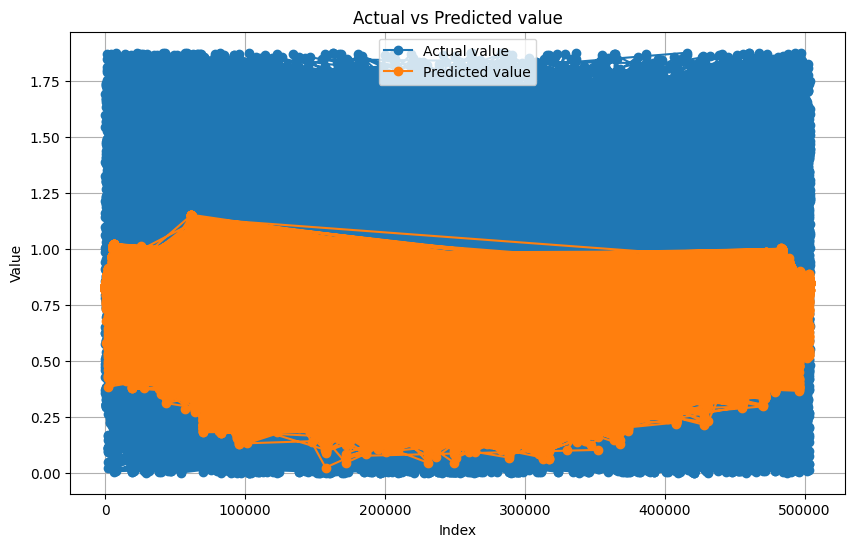

In [ ]:

# 실제 값과 예측 값 비교를 위한 데이터프레임 생성
comparison_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': linear_predicted_value})

# 실제 값과 예측 값 비교 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Actual value'], marker='o', linestyle='-', label='Actual value')
plt.plot(comparison_df.index, comparison_df['Predicted value'], marker='o', linestyle='-', label='Predicted value')
plt.title('Actual vs Predicted value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

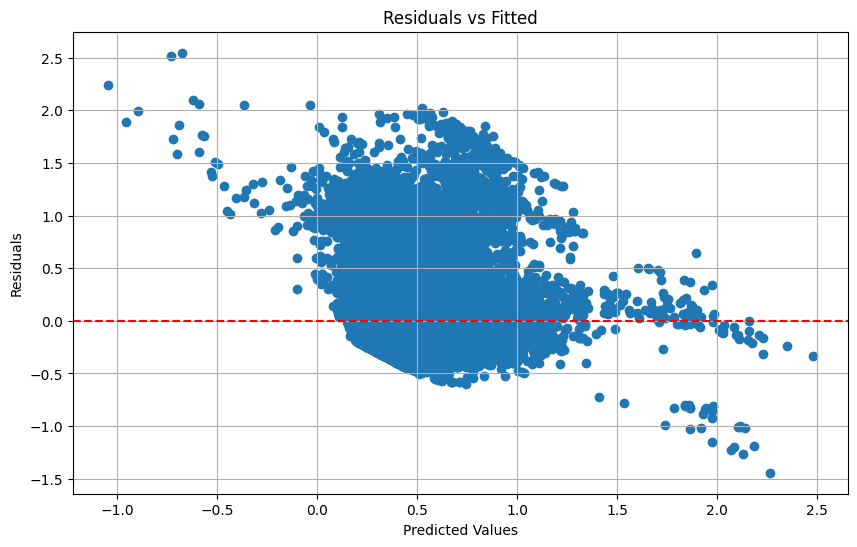

In [ ]:
# 잔차 계산
residuals = y_test - linear_predicted_value

# 잔차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(linear_predicted_value, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True)
plt.show()


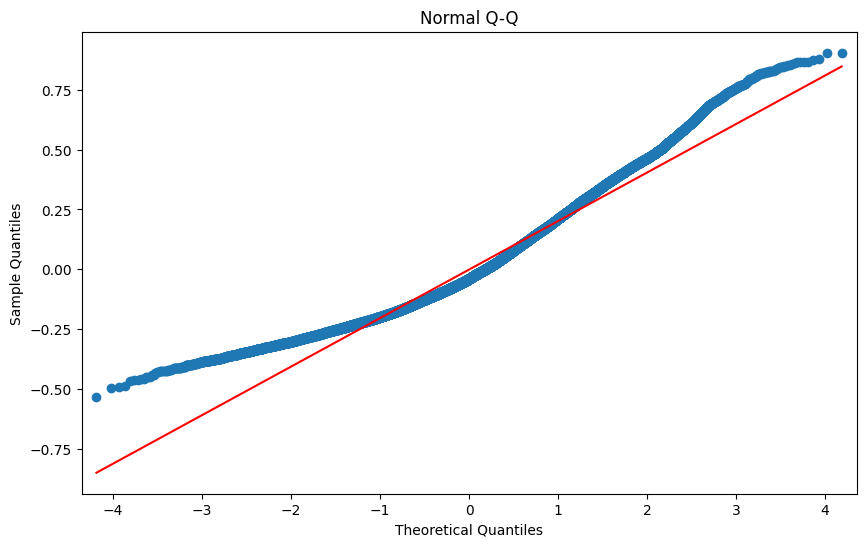

In [ ]:
import statsmodels.api as sm

# Q-Q Plot (잔차의 정규성)
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q')
plt.show()


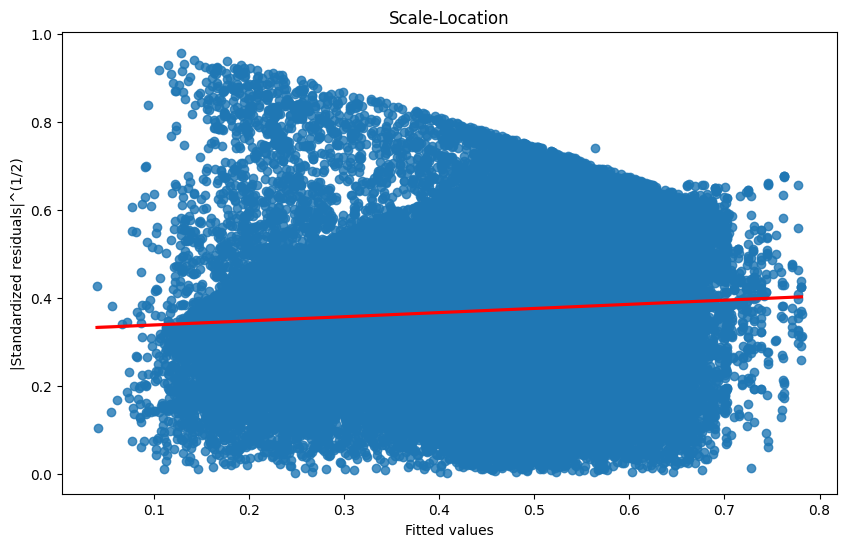

In [ ]:
import seaborn as sns
# Scale-Location (잔차의 등분산성)
plt.figure(figsize=(10, 6))
sns.regplot(x=linear_predicted_value, y=np.sqrt(np.abs(residuals)), line_kws={'color': 'red'})
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel('|Standardized residuals|^(1/2)')
plt.show()


In [ ]:
X_selected.head()

,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow,icon_wind
0,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417,False,False,False,False,False,True,False,False,False
1,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003450,False,False,False,False,False,True,False,False,False
2,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417,False,False,False,False,False,True,False,False,False
3,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003417,False,False,False,False,False,True,False,False,False
4,5,35.87,0.61,8.29,0.75,285.0,0.0,0.0,4,0.003433,False,False,False,False,False,True,False,False,False


## 해결해보기

In [ ]:
# 얘 실행! : 지금까지 한 전처리 방식 각각 불러오기
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_final_hash.csv',encoding='utf-8')

In [ ]:
df.head()

,Unnamed: 0,hour,apparentTemperature,cloudCover,day_of_week,gen_lag_1,humidity,is_weekend,precipIntensity,precipProbability,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow,icon_wind,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,use [kW]
0,0,5,29.4,0.75,4,0.003417,0.61,0,0.0,0.0,False,False,False,False,False,True,False,False,False,0,0,1,0,0,0,0,0,0.465133
1,1,5,29.4,0.75,4,0.003450,0.61,0,0.0,0.0,False,False,False,False,False,True,False,False,False,0,0,1,0,0,0,0,0,0.512933
2,2,5,29.4,0.75,4,0.003417,0.61,0,0.0,0.0,False,False,False,False,False,True,False,False,False,0,0,1,0,0,0,0,0,0.651283
3,3,5,29.4,0.75,4,0.003417,0.61,0,0.0,0.0,False,False,False,False,False,True,False,False,False,0,0,1,0,0,0,0,0,0.710450
4,4,5,29.4,0.75,4,0.003433,0.61,0,0.0,0.0,False,False,False,False,False,True,False,False,False,0,0,1,0,0,0,0,0,1.195683


In [ ]:
df.describe()

,Unnamed: 0,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1,use [kW]
count,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000,503701.000000
mean,251850.000000,11.760394,50.744077,0.664063,6.650847,0.225928,202.332243,0.002599,0.056477,2.963373,0.076260,0.859193
std,145406.098308,6.845863,19.116131,0.194413,3.982691,0.289936,106.532689,0.011259,0.165867,2.182503,0.128445,1.058312
min,0.000000,0.000000,-12.640000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125925.000000,6.000000,35.770000,0.510000,3.660000,0.040000,148.000000,0.000000,0.000000,1.000000,0.003367,0.367850
50%,251850.000000,12.000000,50.330000,0.680000,5.930000,0.120000,208.000000,0.000000,0.000000,2.000000,0.004300,0.562417
75%,377775.000000,18.000000,66.280000,0.840000,8.940000,0.290000,295.000000,0.000000,0.000000,5.000000,0.084000,0.970367
max,503700.000000,23.000000,93.720000,0.980000,22.910000,1.000000,359.000000,0.191000,0.840000,6.000000,0.613883,14.714567


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503701 entries, 0 to 503700
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                503701 non-null  int64  
 1   hour                      503701 non-null  int64  
 2   temperature               503701 non-null  float64
 3   humidity                  503701 non-null  float64
 4   windSpeed                 503701 non-null  float64
 5   cloudCover                503701 non-null  float64
 6   windBearing               503701 non-null  float64
 7   precipIntensity           503701 non-null  float64
 8   precipProbability         503701 non-null  float64
 9   day_of_week               503701 non-null  int64  
 10  gen_lag_1                 503701 non-null  float64
 11  icon_clear-day            503701 non-null  bool   
 12  icon_clear-night          503701 non-null  bool   
 13  icon_cloudy               503701 non-null  b

In [ ]:
# 얘 실행!
# 모든 bool 컬럼을 int로 변환
df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)

In [ ]:
# 얘 실행! : 에러나면 그냥 넘어가기
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

   hour  apparentTemperature  cloudCover  day_of_week  gen_lag_1  humidity  \
0     5                 29.4        0.75            4   0.003417      0.61   
1     5                 29.4        0.75            4   0.003450      0.61   
2     5                 29.4        0.75            4   0.003417      0.61   
3     5                 29.4        0.75            4   0.003417      0.61   
4     5                 29.4        0.75            4   0.003433      0.61   

   is_weekend  precipIntensity  precipProbability  icon_clear-day  \
0           0              0.0                0.0               0   
1           0              0.0                0.0               0   
2           0              0.0                0.0               0   
3           0              0.0                0.0               0   
4           0              0.0                0.0               0   

   icon_clear-night  icon_cloudy  icon_fog  icon_partly-cloudy-day  \
0                 0            0         0    

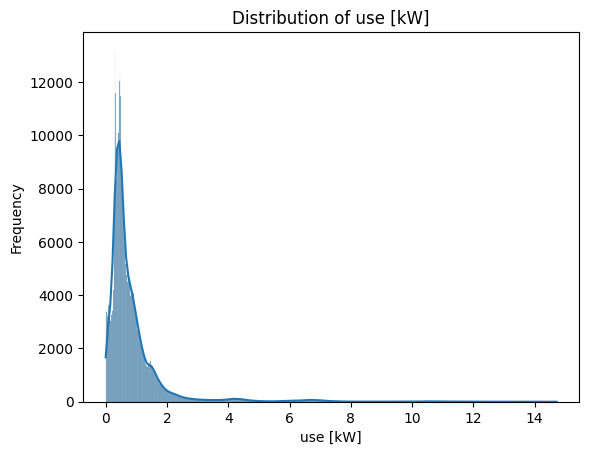

In [ ]:
# use [kW]의 분포 시각화
sns.histplot(df['use [kW]'], kde=True)

# 그래프 제목과 라벨 추가
plt.title('Distribution of use [kW]')
plt.xlabel('use [kW]')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

In [ ]:
# 얘 실행!
# IQR을 계산하여 이상치 제거
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# 이상치의 경계값 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# 이상치를 제외한 데이터 선택
df_outlier = df[(df["use [kW]"] >= lower_bound) & (df["use [kW]"] <= upper_bound)]

# 이상치를 제거한 결과 확인
print(df_outlier.head())

-0.5359250004999999
1.8741416675
   hour  apparentTemperature  cloudCover  day_of_week  gen_lag_1  humidity  \
0     5                 29.4        0.75            4   0.003417      0.61   
1     5                 29.4        0.75            4   0.003450      0.61   
2     5                 29.4        0.75            4   0.003417      0.61   
3     5                 29.4        0.75            4   0.003417      0.61   
4     5                 29.4        0.75            4   0.003433      0.61   

   is_weekend  precipIntensity  precipProbability  icon_clear-day  \
0           0              0.0                0.0               0   
1           0              0.0                0.0               0   
2           0              0.0                0.0               0   
3           0              0.0                0.0               0   
4           0              0.0                0.0               0   

   icon_clear-night  icon_cloudy  icon_fog  icon_partly-cloudy-day  \
0            

In [ ]:
# 얘 실행!
df= df_outlier

In [ ]:
df.describe()

,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow,icon_wind,use [kW]
count,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000
mean,11.720789,50.541342,0.663543,6.665026,0.228119,202.169006,0.002552,0.056713,3.016901,0.077189,0.359087,0.386318,0.012173,0.001879,0.078500,0.055053,0.086172,0.015293,0.005525,0.640832
std,6.827799,18.867061,0.194483,3.981646,0.292516,106.840015,0.010889,0.165836,2.180462,0.129559,0.479733,0.486906,0.109657,0.043302,0.268957,0.228084,0.280618,0.122716,0.074126,0.402765
min,0.000000,-12.640000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,35.790000,0.510000,3.680000,0.040000,147.000000,0.000000,0.000000,1.000000,0.003367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.351900
50%,12.000000,50.150000,0.680000,5.950000,0.120000,208.000000,0.000000,0.000000,2.000000,0.004300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530550
75%,18.000000,65.730000,0.830000,8.960000,0.290000,295.000000,0.000000,0.000000,5.000000,0.085633,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866850
max,23.000000,93.720000,0.980000,22.910000,1.000000,359.000000,0.191000,0.840000,6.000000,0.613883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.874100


In [ ]:
# 얘 실행! : 타겟변수의 이상치 제거
df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash_outlier.csv', encoding='utf-8')

In [ ]:
X_selected = df

In [ ]:
y = X_selected['use [kW]']
X_selected = X_selected.drop(columns=['use [kW]'])

## 1차 시도 ( 이상치 제거 ) 실패

In [ ]:
# 얘 실행!
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_outlier.csv",encoding='utf-8')

KeyboardInterrupt: 

              Feature       VIF
0                 PC9  1.002154
1         temperature  8.449689
2                icon  8.900353
3          cloudCover  2.093285
4     precipIntensity  2.868514
5   precipProbability  3.471641
6                 PC4  1.015101
7                 PC6  1.010783
8                 PC7  1.005594
9                 PC8  1.000949
10               PC10  1.000928
11               PC11  1.004603
12               PC12  1.003078
13               PC14  1.011770
14               PC15  1.001119
15               PC16  1.000418


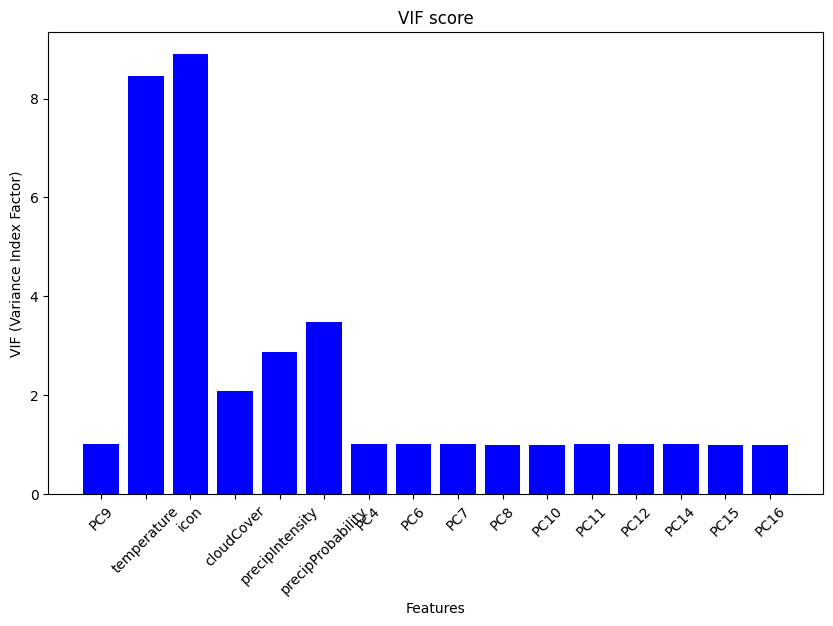

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# 각 변수별 VIF 출력
print(vif_data)

# VIF 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(vif_data["Feature"], vif_data["VIF"], color="blue")
plt.xlabel("Features")
plt.ylabel("VIF (Variance Index Factor)")
plt.title("VIF score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train.shape

(328643, 20)

In [ ]:
# 얘 실행!
df['use [kW]'] = np.log1p(df['use [kW]'])

In [ ]:
# 얘 실행!  : 에러나면 그냥 넘어가기
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

   hour  temperature  humidity  windSpeed  cloudCover  windBearing  \
0     5        35.87      0.61       8.29        0.75        285.0   
1     5        35.87      0.61       8.29        0.75        285.0   
2     5        35.87      0.61       8.29        0.75        285.0   
3     5        35.87      0.61       8.29        0.75        285.0   
4     5        35.87      0.61       8.29        0.75        285.0   

   precipIntensity  precipProbability  day_of_week  gen_lag_1  icon_clear-day  \
0              0.0                0.0            4   0.003417               0   
1              0.0                0.0            4   0.003450               0   
2              0.0                0.0            4   0.003417               0   
3              0.0                0.0            4   0.003417               0   
4              0.0                0.0            4   0.003433               0   

   icon_clear-night  icon_cloudy  icon_fog  icon_partly-cloudy-day  \
0                 0   

In [ ]:
# 얘 실행! : 타겟변수 로그변환
df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash_log1.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_hash_log1.csv', encoding='utf-8')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

   hour  apparentTemperature  cloudCover  day_of_week  gen_lag_1  humidity  \
0     5                 29.4        0.75            4   0.003417      0.61   
1     5                 29.4        0.75            4   0.003450      0.61   
2     5                 29.4        0.75            4   0.003417      0.61   
3     5                 29.4        0.75            4   0.003417      0.61   
4     5                 29.4        0.75            4   0.003433      0.61   

   is_weekend  precipIntensity  precipProbability  icon_clear-day  \
0           0              0.0                0.0           False   
1           0              0.0                0.0           False   
2           0              0.0                0.0           False   
3           0              0.0                0.0           False   
4           0              0.0                0.0           False   

   icon_clear-night  icon_cloudy  icon_fog  icon_partly-cloudy-day  \
0             False        False     False    

In [ ]:
X_selected = df

In [ ]:
y = X_selected['use [kW]']
X_selected = X_selected.drop(columns=['use [kW]'])

## 2차 시도 ( 종속변수 로그변환 ) 실패 but 정규성, 등분산성은 어느정도 만족

In [ ]:
# 얘 실행!
df = pd.read_csv("/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_final_target.csv",encoding='utf-8')

In [ ]:
# 얘 실행!  : 에러나면 넘어가기
df = df.drop(columns=['Unnamed: 0'])
print(df.head())

        PC9  temperature      icon  cloudCover  precipIntensity  \
0 -0.030782        35.87  0.812793        0.75              0.0   
1 -0.026500        35.87  0.812793        0.75              0.0   
2  0.410891        35.87  0.812793        0.75              0.0   
3  0.276182        35.87  0.812793        0.75              0.0   
4  0.466411        35.87  0.812793        0.75              0.0   

   precipProbability       PC4       PC6       PC7       PC8      PC10  \
0                0.0  0.264478 -0.459097  0.526550 -0.167521  0.017426   
1                0.0  0.261694 -0.514000  0.540698 -0.174930 -0.004538   
2                0.0  0.111797 -1.225074  0.419133  0.064428  0.291764   
3                0.0  0.773032 -1.030953  0.627361  0.217788  0.243460   
4                0.0  0.165440 -1.735408  0.508984  0.044268  0.156614   

       PC11      PC12      PC14      PC15      PC16  use [kW]  
0  0.582406 -0.874523 -0.691083  0.006026 -0.880562  0.465133  
1  0.546882 -0.916797 -0

In [ ]:
df.describe()

,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow,icon_wind,use [kW]
count,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000
mean,11.720789,50.541342,0.663543,6.665026,0.228119,202.169006,0.002552,0.056713,3.016901,0.077189,0.359087,0.386318,0.012173,0.001879,0.078500,0.055053,0.086172,0.015293,0.005525,0.640832
std,6.827799,18.867061,0.194483,3.981646,0.292516,106.840015,0.010889,0.165836,2.180462,0.129559,0.479733,0.486906,0.109657,0.043302,0.268957,0.228084,0.280618,0.122716,0.074126,0.402765
min,0.000000,-12.640000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,35.790000,0.510000,3.680000,0.040000,147.000000,0.000000,0.000000,1.000000,0.003367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.351900
50%,12.000000,50.150000,0.680000,5.950000,0.120000,208.000000,0.000000,0.000000,2.000000,0.004300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.530550
75%,18.000000,65.730000,0.830000,8.960000,0.290000,295.000000,0.000000,0.000000,5.000000,0.085633,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.866850
max,23.000000,93.720000,0.980000,22.910000,1.000000,359.000000,0.191000,0.840000,6.000000,0.613883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.874100


In [ ]:
df.columns

Index(['hour', 'apparentTemperature', 'cloudCover', 'day_of_week', 'gen_lag_1',
       'humidity', 'is_weekend', 'precipIntensity', 'precipProbability',
       'icon_clear-day', 'icon_clear-night', 'icon_cloudy', 'icon_fog',
       'icon_partly-cloudy-day', 'icon_partly-cloudy-night', 'icon_rain',
       'icon_snow', 'icon_wind', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4',
       'col_5', 'col_6', 'col_7', 'use [kW]'],
      dtype='object')

In [ ]:
# 얘 실행!
min_temperature = df['temperature'].min()  # -12.64
# 양수로 변환
offset = abs(min_temperature) + 1e-6  # 최소값 절대값 + 작은 양수(안정성 확보)
df['temperature'] = df['temperature'] + offset

In [ ]:
# 얘 실행!
df['use [kW]'] = np.log1p(df['use [kW]'])
df['hour'] = np.log1p(df['hour'])
df['temperature'] = np.log1p(df['temperature'])
df['windSpeed'] = np.log1p(df['windSpeed'])
df['windBearing'] = np.log1p(df['windBearing'])
df['day_of_week'] = np.log1p(df['day_of_week'])

In [ ]:
df.describe()

,hour,temperature,humidity,windSpeed,cloudCover,windBearing,precipIntensity,precipProbability,day_of_week,gen_lag_1,icon_clear-day,icon_clear-night,icon_cloudy,icon_fog,icon_partly-cloudy-day,icon_partly-cloudy-night,icon_rain,icon_snow,icon_wind,use [kW]
count,469491.000000,4.694910e+05,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000,469491.000000
mean,2.312194,4.110112e+00,0.663543,1.895587,0.228119,4.983316,0.002552,0.056713,1.193645,0.077189,0.359087,0.386318,0.012173,0.001879,0.078500,0.055053,0.086172,0.015293,0.005525,0.467263
std,0.797337,3.475213e-01,0.194483,0.552068,0.292516,1.078710,0.010889,0.165836,0.680102,0.129559,0.479733,0.486906,0.109657,0.043302,0.268957,0.228084,0.280618,0.122716,0.074126,0.232939
min,0.000000,9.999995e-07,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.945910,3.900558e+00,0.510000,1.543298,0.040000,4.997212,0.000000,0.000000,0.693147,0.003367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301511
50%,2.564949,4.155596e+00,0.680000,1.938742,0.120000,5.342334,0.000000,0.000000,1.098612,0.004300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425627
75%,2.944439,4.374120e+00,0.830000,2.298577,0.290000,5.690359,0.000000,0.000000,1.791759,0.085633,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.624253
max,3.178054,4.676188e+00,0.980000,3.174297,1.000000,5.886104,0.191000,0.840000,1.945910,0.613883,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.055740


In [ ]:
# 얘 실행! : 독립변수들도 로그 변환
df.to_csv('/content/drive/MyDrive/데이터마이닝/Team_Project/temp/scaled_log2.csv', encoding='utf-8')

In [ ]:
X_selected = df

In [ ]:
y = X_selected['use [kW]']
X_selected = X_selected.drop(columns=['use [kW]'])

## 3차 시도 ( 독립변수 로그변환 ) 별 의미 없는 듯 오히려 결과 안 좋아짐

## 4차 시도 ( 가구들 PCA 처리 )

## 5차 시도 ( 그냥 2차 시도 부분에서 변수들 PCA 처리해보자 )

In [ ]:
# 얘 실행? 변수선택 때 선택된 변수들 PCA 처리
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


columns_to_pca = [ 'hour', 'temperature', 'humidity', 'windSpeed',
                  'cloudCover', 'windBearing', 'precipIntensity', 'precipProbability',
                   'day_of_week', 'gen_lag_1',]

X = df[columns_to_pca].values

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 주성분 결과 데이터프레임 생성
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

df = df.drop(columns=columns_to_pca)

print("주성분 별 설명된 분산 비율:")
print(pca.explained_variance_ratio_)

df = pd.concat([df, df_pca], axis=1)
print(df.head())
print("\nPCA 결과 데이터프레임:")
print(df_pca.head())


주성분 별 설명된 분산 비율:
[0.24557817 0.15315259 0.12466931 0.1044212  0.09752263 0.08883943
 0.07400737 0.05867671 0.03452466 0.01860793]
   icon_clear-day  icon_clear-night  icon_cloudy  icon_fog  \
0               0                 0            0         0   
1               0                 0            0         0   
2               0                 0            0         0   
3               0                 0            0         0   
4               0                 0            0         0   

   icon_partly-cloudy-day  icon_partly-cloudy-night  icon_rain  icon_snow  \
0                       0                         1          0          0   
1                       0                         1          0          0   
2                       0                         1          0          0   
3                       0                         1          0          0   
4                       0                         1          0          0   

   icon_wind  use [kW]       PC1  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469491 entries, 0 to 469490
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   hour                      469491 non-null  int64  
 1   temperature               469491 non-null  float64
 2   humidity                  469491 non-null  float64
 3   windSpeed                 469491 non-null  float64
 4   cloudCover                469491 non-null  float64
 5   windBearing               469491 non-null  float64
 6   precipIntensity           469491 non-null  float64
 7   precipProbability         469491 non-null  float64
 8   day_of_week               469491 non-null  int64  
 9   gen_lag_1                 469491 non-null  float64
 10  icon_clear-day            469491 non-null  int64  
 11  icon_clear-night          469491 non-null  int64  
 12  icon_cloudy               469491 non-null  int64  
 13  icon_fog                  469491 non-null  i